# * 1. PERFORMING PRELIMINARY DATA INSPECTION *

## Importing necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Excel file name - "HeartDisease.xlsx" into a pandas DataFrame:

In [2]:
data=pd.read_excel('HeartDiseasedata.xlsx')

## DATA PREPARATION:
### Data Description

In [3]:
data.head() #Viewed the first few rows of the DataFrame:

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The features following are used for the prediction of heart disease presence:

##### age: age in years
##### sex:
- 0 = Female
- 1 = Male

##### cp: Chest pain types
- 0 = Typical angina
- 1 = Atypical angina
- 2 = Non-angina pain
- 3 = Asymptomatic

##### trestbps: Resting blood pressure (mmHg)
- High blood pressure = 140 mmHg or above

##### chol: Serum cholestoral (mg/dL)
- Certain elements in the blood, including low-density lipoprotein (LDL), high-density lipoprotein (HDL) and triglycerides
- Calculation = HDL + LDL + 0.2 * triglycerides
- Higher than 200 mg/dL is concerned

##### fbs: Fasting blood sugar (> 120 mg/dL)
- 0 = False
- 1 = True
- Higher than 126 mg/dL points to diabetes

##### restecg: Resting electrocardiographic results
- 0 = Normal
- 1 = Abnormal ST-T wave
- 2 = Showing probable or definite left ventricular hypertrophy

##### thalach: Maximum heart rate achieved (bpm)

##### exang: Exercise induced angina
- 0 = Negative
- 1 = Positive

##### oldpeak: ST depression induced by exercise relative to rest

##### slope: The slope of the peak exercise ST segment
- 0 = Upsloping
- 1 = Horizontal
- 2 = Downsloping

##### ca: Number of major vessels (0-3) colored by fluoroscopy
- The colored blood vessels are passing through
- There is a clot if the blood vessel is not colored

##### thal: Thallium scintigraphy
- 0=Null
- 1= Normal
- 2= Fixed Defect
- 3=Reversable defect.

##### target: Heart Disease
- 0 = Benign(negative)Benign tumors are not cancerous.
- 1 = Malignant(positive)Malignant tumors are cancerous.

## Renaming the column names, as those are difficult to understand:

In [4]:
data.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 
              'Cholesterol', 'Fasting_bs', 'Resting_ecg', 
              'Max_heart_rate', 'Exercise_induced_angina', 
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Cancer_Type']
# Renamed origical columns

## Checking the dimensions of the DataFrame:

In [5]:
data.shape

(303, 14)

## Checking for missing values:

In [6]:
data.isnull().sum()

Age                        0
Sex                        0
Chest_pain_type            0
Resting_bp                 0
Cholesterol                0
Fasting_bs                 0
Resting_ecg                0
Max_heart_rate             0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Num_major_vessels          0
Thallium_test              0
Cancer_Type                0
dtype: int64

As we can see, there are no null or missing values.

In [7]:
data.duplicated().sum()
#Checked for duplicates:

1

## Removing or dropping Duplicate values:

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

## Calculating summary statistics to explore the measures of central tendencies and the spread of the data overall:

In [9]:
data.describe()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Cancer_Type
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Checking the data types of each column:

In [10]:
data.dtypes

Age                          int64
Sex                          int64
Chest_pain_type              int64
Resting_bp                   int64
Cholesterol                  int64
Fasting_bs                   int64
Resting_ecg                  int64
Max_heart_rate               int64
Exercise_induced_angina      int64
ST_depression              float64
ST_slope                     int64
Num_major_vessels            int64
Thallium_test                int64
Cancer_Type                  int64
dtype: object

## Exploring unique values in categorical columns:

In [11]:
data.nunique(axis=0)

Age                         41
Sex                          2
Chest_pain_type              4
Resting_bp                  49
Cholesterol                152
Fasting_bs                   2
Resting_ecg                  3
Max_heart_rate              91
Exercise_induced_angina      2
ST_depression               40
ST_slope                     3
Num_major_vessels            5
Thallium_test                4
Cancer_Type                  2
dtype: int64

In [12]:
# or else if we want to search specific datatype only in columns, we can use this code;
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index([], dtype='object')

# * 2. PERFORMING EXPLORATORY DATA ANALYSIS *

## Identify the data variables which might be categorical in nature. Describe and explore these variables :

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      302 non-null    int64  
 1   Sex                      302 non-null    int64  
 2   Chest_pain_type          302 non-null    int64  
 3   Resting_bp               302 non-null    int64  
 4   Cholesterol              302 non-null    int64  
 5   Fasting_bs               302 non-null    int64  
 6   Resting_ecg              302 non-null    int64  
 7   Max_heart_rate           302 non-null    int64  
 8   Exercise_induced_angina  302 non-null    int64  
 9   ST_depression            302 non-null    float64
 10  ST_slope                 302 non-null    int64  
 11  Num_major_vessels        302 non-null    int64  
 12  Thallium_test            302 non-null    int64  
 13  Cancer_Type              302 non-null    int64  
dtypes: float64(1), int64(13)
m

- Sex: Categorical variable representing gender, with values 0 for Female and 1 for Male.
- Chest_pain_type: Categorical variable representing chest pain types, with values 0 for Typical angina, 1 for Atypical angina, 2 for Non-angina pain, and 3 for Asymptomatic.
- Fasting_bs: Categorical variable representing fasting blood sugar, with values 0 for False and 1 for True.
- Resting_ecg: Categorical variable representing resting electrocardiographic results, with values 0 for Normal, 1 for Abnormal ST-T wave, and 2 for Showing probable or definite left ventricular hypertrophy.
- Excercise_induced_angina: Categorical variable representing exercise-induced angina, with values 0 for Negative and 1 for Positive.
- ST_slope: Categorical variable representing the slope of the peak exercise ST segment, with values 0 for Upsloping, 1 for Horizontal, and 2 for Downsloping.
- Num_major_vessels: Categorical variable representing the number of major vessels (0-3) colored by fluoroscopy.
- Thallium_test: Categorical variable representing thallium scintigraphy, with values 3 for Normal, 6 for Fixed defect, and 7 for Reversible defect.
- Cancer_Type: Categorical variable representing the presence of heart disease, with values 0 for Benign (negative) and 1 for Malignant (positive).

## Identified columns to categorical data type and Describe and explore these variables using appropriate tools.:

In [14]:
categorical_vars = ['Sex','Chest_pain_type','Fasting_bs','Resting_ecg','Exercise_induced_angina','ST_slope', 
                    'Num_major_vessels','Thallium_test', 'Cancer_Type']

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      302 non-null    int64  
 1   Sex                      302 non-null    int64  
 2   Chest_pain_type          302 non-null    int64  
 3   Resting_bp               302 non-null    int64  
 4   Cholesterol              302 non-null    int64  
 5   Fasting_bs               302 non-null    int64  
 6   Resting_ecg              302 non-null    int64  
 7   Max_heart_rate           302 non-null    int64  
 8   Exercise_induced_angina  302 non-null    int64  
 9   ST_depression            302 non-null    float64
 10  ST_slope                 302 non-null    int64  
 11  Num_major_vessels        302 non-null    int64  
 12  Thallium_test            302 non-null    int64  
 13  Cancer_Type              302 non-null    int64  
dtypes: float64(1), int64(13)
m

### Exploring categorical variables using Bar plots:

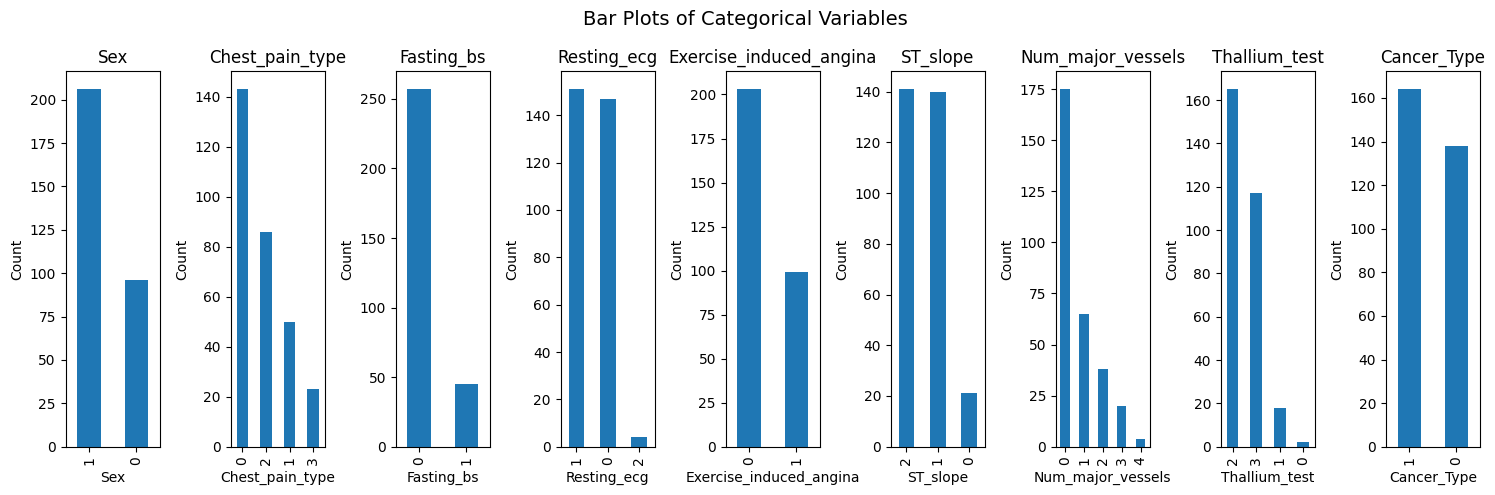

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(15,5))
plt.subplots_adjust(wspace=0.5)  # For Adjusting the width spacing between subplots

for i, var in enumerate(categorical_vars):
    data[var].value_counts().plot(kind='bar', ax=axes[i])
    plt.title(categorical_vars)
    axes[i].set_title(f"{var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.suptitle("Bar Plots of Categorical Variables", fontsize=14) # For adding a common title
plt.tight_layout()  # For automatically adjusting spacing between subplots and labels
plt.show()

### We can also use the following features for observation:
The features following are used for the prediction of heart disease presence:

##### Sex:
- 0 = Female
- 1 = Male

##### Chest_pain_type
- 0 = Typical angina
- 1 = Atypical angina
- 2 = Non-angina pain
- 3 = Asymptomatic

##### Fasting_bs: Fasting blood sugar (> 120 mg/dL)
- 0 = False
- 1 = True
- Higher than 126 mg/dL points to diabetes

##### Resting_ecg: Resting electrocardiographic results
- 0 = Normal
- 1 = Abnormal ST-T wave
- 2 = Showing probable or definite left ventricular hypertrophy

##### Exercise_induced_angina:
- 0 = Negative
- 1 = Positive

##### ST_slope: The slope of the peak exercise ST segment
- 0 = Upsloping
- 1 = Horizontal
- 2 = Downsloping

##### Num_major_vessels: Number of major vessels (0-3) colored by fluoroscopy
- The colored blood vessels are passing through
- There is a clot if the blood vessel is not colored

##### Thallium_test: Thallium scintigraphy
- 3 = Normal
- 6 = Fixed defect
- 7 = Reversable defect

##### Cancer_Type: Heart Disease
- 0 = Benign(negative)Benign tumors are not cancerous.
- 1 = Malignant(positive)Malignant tumors are cancerous.

### We can also explore categorical variables using clount plots.

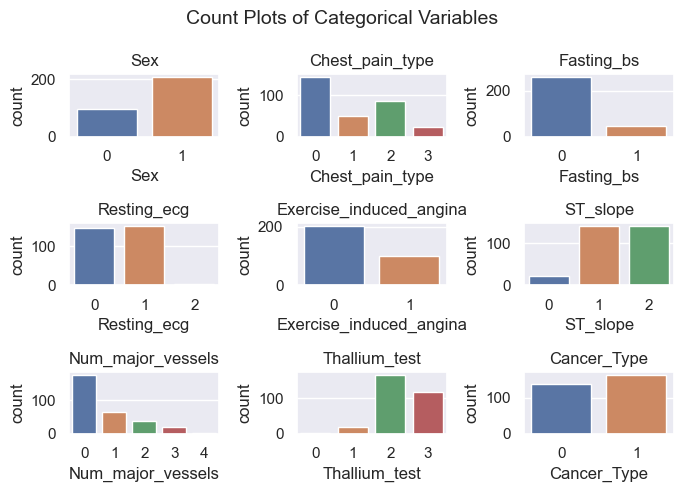

In [25]:
categorical_vars = ['Sex', 'Chest_pain_type', 'Fasting_bs', 'Resting_ecg', 'Exercise_induced_angina', 
                    'ST_slope', 'Num_major_vessels','Thallium_test', 'Cancer_Type']

plt.figure(figsize=(7,5))
sns.set(style="darkgrid")
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=var, data=data)
    plt.title(var)

plt.suptitle("Count Plots of Categorical Variables", fontsize=14) # For adding a common title
plt.tight_layout()
plt.show()

### We will try to plot Histogram for numerial variable:

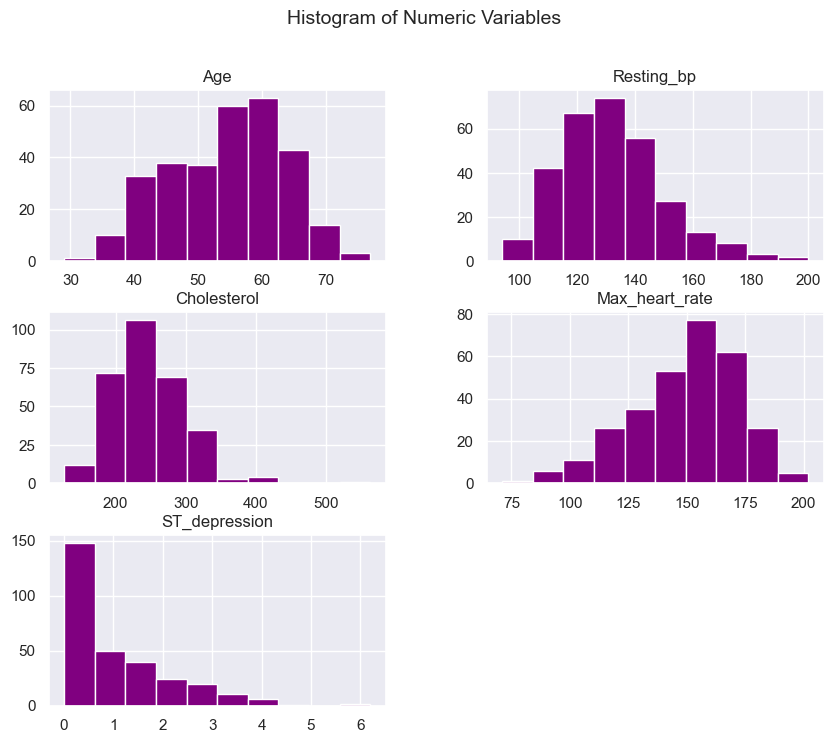

In [26]:
numeric_vars = data.iloc[:,[0,3,4,7,9]]
color = ['purple']
numeric_vars.hist(figsize=(10,8), color=color)
plt.suptitle("Histogram of Numeric Variables", fontsize=14) # For adding a common title
plt.show()

### From above graphs, we observe that:
- ST.depression(exercise/rest) is right skewed.
- Maximum heart rate achieved is left skewed.
- Age,Cholestrol,Resting Blood Pressure is normally distributed.

### The following features can be considered as numerical variables:
- Age: Numerical Variable representing age in years.
- Resting blood pressure: Numerical Variable representing resting blood pressure, measured in mmHg and high bp is considered to be 140 mmHg or above.
- Cholesterol: Numerical Variable, measured in mg/dL. It representing certain elements in the blood, including low-density lipoprotein (LDL), high-density lipoprotein (HDL), and triglycerides. The calculation for cholestoral is HDL + LDL + 0.2 * triglycerides.  A value higher than 200 mg/dL is generally considered concerning.
- Maximum heart rate achieved: Numerical Variable, measured in beats per minute. 
- ST depression induced by exercise relative to rest.
- (ST depression observed during exercise compared to the resting state can provide insights into the presence and severity of heart disease.)

##### Age: age in years

##### Resting_bp: Resting blood pressure (mmHg)
- High blood pressure = 140 mmHg or above

##### Cholesterol: Serum cholestoral (mg/dL)
- Certain elements in the blood, including low-density lipoprotein (LDL), high-density lipoprotein (HDL) and triglycerides
- Calculation = HDL + LDL + 0.2 * triglycerides
- Higher than 200 mg/dL is concerned

##### Max_Heart_rate: Maximum heart rate achieved (bpm)

##### ST_depression: ST depression induced by exercise relative to rest

## Studying the occurrence of CVD across different ages:

CVD occurrence refers to the incidence or prevalence of Cardiovascular Disease (CVD) within a population or study sample. Cardiovascular diseases are a class of diseases that involve the heart and blood vessels, and they can include conditions such as coronary artery disease, heart attacks, strokes, and heart failure.

When studying CVD occurrence, researchers analyze the frequency or proportion of individuals within a population who have been diagnosed with or are at risk of developing cardiovascular diseases. This analysis helps understand the prevalence and distribution of CVD and identify factors associated with its occurrence.

In [27]:
#Creating age groups or bins to categorize individuals based on their age.
age_groups = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70, 80])
age_groups

0      (60, 70]
1      (30, 40]
2      (40, 50]
3      (50, 60]
4      (50, 60]
         ...   
298    (50, 60]
299    (40, 50]
300    (60, 70]
301    (50, 60]
302    (50, 60]
Name: Age, Length: 302, dtype: category
Categories (6, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

In [28]:
#Grouping the data by the age groups created in the previous step using the groupby() function.
grouped_data = data.groupby(age_groups)
grouped_data

In [29]:
#Calculating the occurrence of CVD in each age group by counting the number of individuals with CVD within each group.
cvd_occurrence = grouped_data['Age'].sum()
cvd_occurrence

Age
(20, 30]      29
(30, 40]     634
(40, 50]    3422
(50, 60]    7189
(60, 70]    4721
(70, 80]     440
Name: Age, dtype: int64

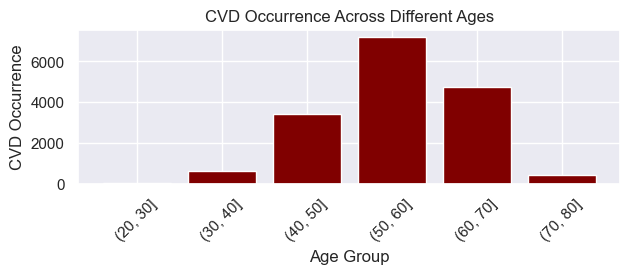

In [30]:
# Ploting the occurrence of CVD across different age groups
plt.figure(figsize=(7,2))
plt.bar(cvd_occurrence.index.astype(str), cvd_occurrence, color='maroon')
plt.xlabel('Age Group')
plt.ylabel('CVD Occurrence')
plt.title('CVD Occurrence Across Different Ages')
plt.xticks(rotation=45)
plt.show()

### We can also try using Count plot:

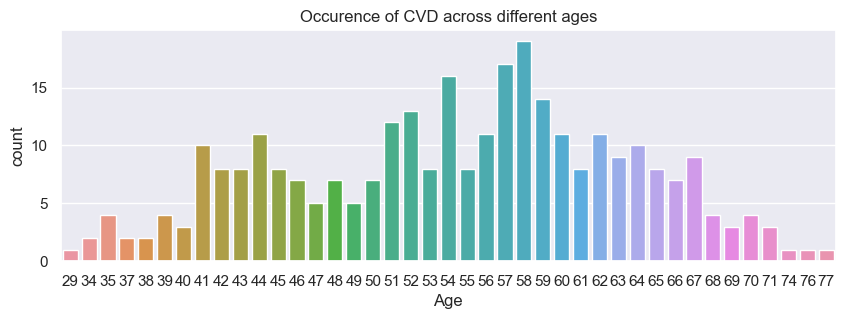

In [31]:
plt.figure(figsize = (10,3))
sns.countplot(x ="Age",data= data)
plt.title("Occurence of CVD across different ages")
plt.show()

### Observation:
- We can observe that occurence of disease is more in the age group between 40 to 70, but people of age 50-60 are at more risk.

## Can we detect heart attack based on anomalies in resting blood pressure of the patient?

### Identifying anomalies in resting blood pressure:

To identify anomalies in resting blood pressure, we can use various statistical methods. One commonly used approach is to calculate the z-score for each data point and flag those that fall outside a certain threshold.

In [32]:
# Calculating z-scores for resting blood pressure
mean_bp = np.mean(data['Resting_bp'])
std_bp = np.std(data['Resting_bp'])
mean_bp, std_bp

(131.60264900662253, 17.534291651254144)

Calculating the z-scores for resting blood pressure helps in identifying anomalies by measuring how many standard deviations each data point is away from the mean. The z-score represents the distance between a data point and the mean, normalized by  the standard deviation. It allows us to understand how extreme or unusual a particular data point is within the distribution
and making it easier to identify outliers or extreme values.

In [33]:
# Calculating quantiles of resting blood pressure
quantiles= data['Resting_bp'].quantile([0.10, 0.25, 0.50, 0.70, 0.90, 0.95, 0.99])
quantiles

0.10    110.0
0.25    120.0
0.50    130.0
0.70    140.0
0.90    152.0
0.95    160.0
0.99    180.0
Name: Resting_bp, dtype: float64

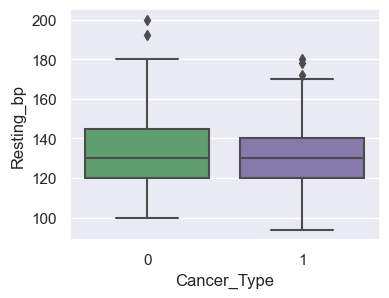

In [34]:
# Determining distribution of resting blood pressure (Resting_bp) based on the cancer type (Cancer_Type) 
# in the provided data dataframe.
sns.set(style="darkgrid")
colors = ["g", "m"]
plt.figure(figsize=(4, 3))
sns.boxplot(y= "Resting_bp", x="Cancer_Type", data=data, palette=colors) 
#here we consider cancer_type(heart disease) variable represent as heart attack.
plt.show()

#### Cancer_Type: Heart Disease
- 0 = Benign(negative)Benign tumors are not cancerous.
- 1 = Malignant(positive)Malignant tumors are cancerous.

In [35]:
# Defining a threshold for resting blood pressure anomalies
threshold = quantiles[0.99]
threshold

180.0

In [36]:
# Extracting resting blood pressure values
Resting_bp = data['Resting_bp']
# Identify anomalies in resting blood pressure
anomalies = Resting_bp[(Resting_bp > threshold) | (Resting_bp < threshold)]
anomalies

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: Resting_bp, Length: 299, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#'Cancer_Type' column indicating the presence of a heart Disease
features = data[['Resting_bp']]  # Features used for training (resting blood pressure)
labels = data['Cancer_Type']  # Labels indicating heart Disease presence

# Split the data into training and testing sets (not shown)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Predict on the test data and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC-ROC: {auc_roc}")

Accuracy: 0.5409836065573771
Precision: 0.5416666666666666
Recall: 0.8125
AUC-ROC: 0.5269396551724138


In [39]:
# Assuming you have new data for prediction with 'Resting_bp' column
new_data = data[['Resting_bp']]  # Features for prediction

# Predicting on the new data
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

[0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 1 1 0 1 1]


In [40]:
data['Resting_bp'].value_counts()

120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: Resting_bp, dtype: int64

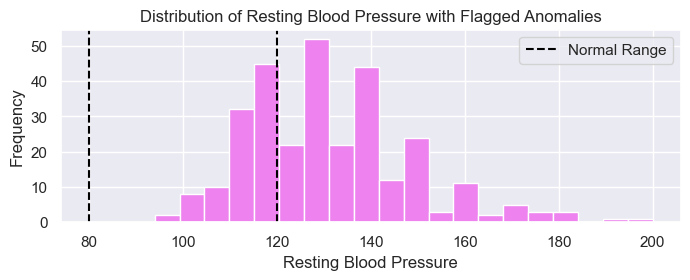

Empty DataFrame
Columns: [Resting_bp, anomaly_Resting_bp]
Index: []


In [41]:
# Defining the normal range of resting blood pressure
normal_range_min = 80
normal_range_max = 120


data['anomaly_Resting_bp'] = np.abs(data['Resting_bp'] - mean_bp) > (threshold * std_bp)

plt.figure(figsize=(8, 2.5))

# Ploting the distribution of resting blood pressure with flagged anomalies
plt.hist(data['Resting_bp'], bins=20, color='violet')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Resting Blood Pressure with Flagged Anomalies')
plt.axvline(x=normal_range_min, color='black', linestyle='--', label='Normal Range')
plt.axvline(x=normal_range_max, color='black', linestyle='--')
plt.legend()
plt.show()

# Print the flagged anomalies
anomaly_data = data[data['anomaly_Resting_bp']]
print(anomaly_data[['Resting_bp', 'anomaly_Resting_bp']])

##### trestbps: Resting blood pressure (mmHg)
- High blood pressure = 140 mmHg or above



### Observation:
- The output of the flagged anomalies is an empty DataFrame. it means that no anomalies were detected based on the specified criteria. In this case, none of the resting blood pressure values deviated significantly from the normal range or exceeded the defined threshold. Anomalies in resting blood pressure alone may not be sufficient to accurately detect or predict heart attacks. Heart attack risk assessment typically involves considering multiple factors, including age, gender, chest pain type, cholesterol levels etc,

###  Checking if there’s a good proportion of positive & negative Binary prediction:

In [42]:
data['Cancer_Type'].value_counts()

1    164
0    138
Name: Cancer_Type, dtype: int64

### As we can be see from above, there is a good balance between the positive & negative binary predictor.

In the given case, the target variable represents whether a tumor is malignant (1) or benign (0). With 165 instances labeled as malignant and 138 instances labeled as benign, the class distribution is reasonably balanced. While it is not a perfectly equal distribution, but, the difference in counts between the two classes is relatively close.

In general, having a relatively balanced distribution between the positive (malignant) and negative (benign) classes is desirable for binary classification tasks. This balance allows the model to learn from a sufficient number of instances from both classes, avoiding a bias towards either class.

Therefore, based on the provided counts, the class balance appears to be reasonably good.

### In summary:
- Having a good balance in a dataset helps in training accurate models, reliable evaluation, preventing bias, effective feature analysis, and addressing real-world imbalances. Balancing the dataset can lead to more robust and unbiased models, ensuring better performance on both majority and minority classes. It allows the model to effectively learn from both classes and make accurate predictions for new instances.

## Study the composition of overall patients w.r.t . gender.

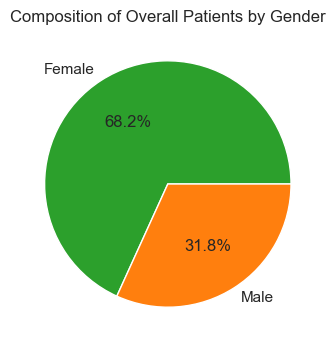

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the number of patients by gender
gender_counts = data['Sex'].value_counts()

# Plotting the composition of overall patients by gender
labels = ['Female', 'Male']
colors = ['tab:green', 'tab:orange']
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Composition of Overall Patients by Gender')

plt.show()

- We can observe that approximately 68.2% of the overall patients are females, while approximately 31.8% are males. This indicates that there is a higher representation of females in the dataset compared to males.

### Lets find out the Composition of Patients by Gender and Cancer Type:

In [44]:
# Counting the number of patients by gender and cancer type
cancer_counts = data.groupby(['Sex', 'Cancer_Type']).size().reset_index(name='Count')
cancer_counts

,Sex,Cancer_Type,Count
0,0,0,24
1,0,1,72
2,1,0,114
3,1,1,92


In [45]:
# Creating a pivot table to reshape the data for the pie chart
pivot_table = cancer_counts.pivot(index='Sex', columns='Cancer_Type', values='Count')
pivot_table

Cancer_Type,0,1
Sex,,
0,24,72
1,114,92


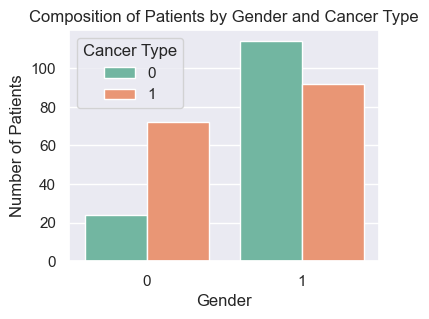

In [46]:
# Plotting the composition of patients by gender and cancer type
plt.figure(figsize=(4,3))
sns.countplot(data=data, x='Sex', hue='Cancer_Type', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Composition of Patients by Gender and Cancer Type')
plt.legend(title='Cancer Type')
plt.show()

- From the above graph it can be concluded that male patients are more prone to the Cardiovascular disease. Target = 0 represent Don't have disease, 1 represent have Disease

## Describe the relationship between cholesterol levels and our target variable.

### Here are the steps to describe the relationship between cholesterol levels and the target variable:

- STEP-1 Calculating descriptive statistics for cholesterol levels:

In [47]:
data['Cholesterol'].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: Cholesterol, dtype: float64

- STEP-2 Comparing cholesterol levels between target variable groups:

In [48]:
target_groups = data.groupby('Cancer_Type')
# Grouped the data based on the target variable; Here we renamed target variable to Cancer_Type.

mean_cholesterol = target_groups['Cholesterol'].mean()
# Calculated mean cholesterol levels for each group
print(mean_cholesterol)

Cancer_Type
0    251.086957
1    242.640244
Name: Cholesterol, dtype: float64


#### This output indicates the mean cholesterol levels for each group:
- Group 0 (non-cancerous cases) has a mean cholesterol level of 251.086957.
- Group 1 (cancerous cases) has a mean cholesterol level of 242.640244.
- These values represent the average cholesterol levels for the respective groups. It suggests that, on average, the cholesterol levels are slightly lower in the cancerous cases compared to the non-cancerous cases. 

- STEP-3 Performing statistical tests (e.g., t-test or ANOVA) to compare cholesterol levels between groups:

In [49]:
from scipy import stats

# Separated the cholesterol levels for each group
group_0_cholesterol = data[data['Cancer_Type'] == 0]['Cholesterol']
group_1_cholesterol = data[data['Cancer_Type'] == 1]['Cholesterol']

# As we have only 2 groups we performed independent t-test
t_statistic, p_value = stats.ttest_ind(group_0_cholesterol, group_1_cholesterol)

# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.4152344258787561
P-Value: 0.1580369746424971


- STEP-4 Visualizing the Relation

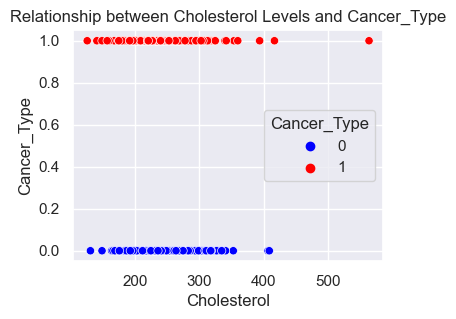

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
sns.set(style="darkgrid")
# Scatter plot of cholesterol levels and target variable (Cancer_Type)
sns.scatterplot(data=data, x='Cholesterol', y='Cancer_Type', hue='Cancer_Type', palette=['blue', 'red'])
plt.xlabel('Cholesterol')
plt.ylabel('Cancer_Type')
plt.title('Relationship between Cholesterol Levels and Cancer_Type')
plt.show()

#### Cancer_Type: Heart Disease
- 0 = Benign(negative)Benign tumors are not cancerous.
- 1 = Malignant(positive)Malignant tumors are cancerous.

let's understand deeply;

In [51]:
# Calculating correlation coefficient between cholesterol levels and target variable('Cancer_Type')
correlation = data['Cholesterol'].corr(data['Cancer_Type'])
print(correlation)

-0.08143720051844133


### Observation:
- In this case, the correlation coefficient of -0.0814 (negative) suggests a very weak negative correlation between cholesterol levels and the target variable. Therefore, based on this correlation coefficient, there is no meaningful association between cholesterol levels and the target variable in the given data.
- Based on this correlation coefficient, cholesterol alone is a strong determinant or predictor of cancer type/heart disease. 

### Overall_myview: Describe the relationship between cholesterol levels and our target variable.

#### Statistical Tests - The t-statistic and p-value obtained from the t-test represent the results of the statistical test comparing cholesterol levels between two groups (group 0 and group 1). Here's what these values mean:
- 1) T-Statistic: The t-statistic measures the difference between the means of the two groups relative to the variation within each group. In this case, the t-statistic is approximately 1.415.
- 2) P-Value: The p-value is the probability of observing the obtained difference (or a more extreme difference) between the two groups if the null hypothesis is true. In this case, the obtained p-value is approximately 0.158. The p-value is compared to a predetermined significance level (commonly 0.05) to determine the statistical significance of the difference.
- If the p-value is less than the significance level, it indicates that the observed difference is statistically significant. Conversely, if the p-value is greater than the significance level, it suggests that the observed difference may be due to random chance and is not statistically significant.

#### Observation:     
- Based on the previous output, the average cholesterol levels of non-cancerous cases (251.086957) and cancerous cases (242.640244) are quite close, the difference in mean cholesterol levels between the two groups is approximately 8.446713.
- and based on this t-test or statistical test output, the obtained p-value of 0.158 is greater than the significance level of 0.05, indicates that this difference is not statistically significant.
- it suggests that the observed difference may be due to random chance (or variables which are not considered in the analysis could still influence the relationship between cholesterol levels and cancer occurrence).
- based on the available data and the statistical analysis conducted, we do not have enough evidence to establish a strong relationship between cholesterol levels and the occurrence of cancer.
- based on vizualizations it shows that there is no much difference.

#### Conclusion:
- In this case, the null hypothesis (H0) is that there is no significant difference in cholesterol levels between non-cancerous and cancerous cases. The alternative hypothesis (H1) is that there is a significant difference in cholesterol levels between the two groups.
- Since, we do not have strong evidence to reject the null hypothesis, which means there is no significant difference in cholesterol levels between the two groups based on the given data.
- Therefore, based on the given data , statistical analysis and visualizations, we cannot confidently say that there is a meaningful relationship or association between cholesterol levels and the target variable (cancer type).


## What can be concluded about the relationship between peak exercising and the occurrence of a heart attack?

In [52]:
# the correlation coefficient to understand the relationship
data['ST_slope'].corr(data['Cancer_Type'])

0.3439395324893867

The correlation coefficient is close to 1, it indicates a strong positive relationship, meaning that as the peak exercising level increases, the likelihood of a heart attack also tends to increase.

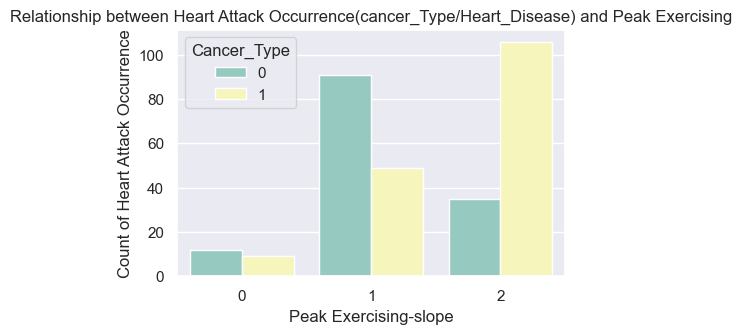

In [54]:
# Let's Visualize and understand the relationship between peak exercising and the occurrence of a heart attack.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3.2))
sns.countplot(data=data, x='ST_slope', hue='Cancer_Type', palette='Set3')
plt.xlabel('Peak Exercising-slope')
plt.ylabel(('Count of Heart Attack Occurrence'))
plt.title('Relationship between Heart Attack Occurrence(cancer_Type/Heart_Disease) and Peak Exercising')
#heart attack indicates the cancer_type(heartdisease)
plt.show()

The slope of the peak exercise ST segment:
0 = Upsloping
1 = Horizontal
2 = Downsloping  

### we can conclude the following about the relationship between peak exercising and the occurrence of a heart attack:

#### Correlation Coefficient:
- The correlation coefficient of 0.3439 indicates a positive relationship between peak exercising and the likelihood of a heart attack or positive Cancer_type. As the level of peak exercising increases, there is a tendency for the occurrence of a heart attack to increase. However, it's important to note that correlation does not imply causation, and there may be other factors influencing the relationship.

#### Downsloping Slope:
- The countplot suggests that individuals with a downsloping(2) of the peak exercise ST segment have a higher likelihood of experiencing a heart attack. This indicates that the downsloping slope may be associated with a higher risk of heart attack occurrence.

### Conclusion:
- Based on these observations, we can conclude that there is a positive relationship between peak exercising and the occurrence of a heart attack, and individuals with a downsloping slope may be at a higher risk.

## Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

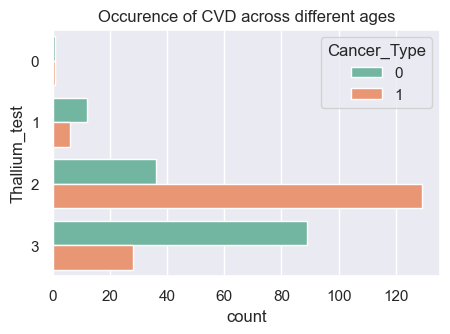

In [56]:
plt.figure(figsize = (5,3.2))
sns.set_style('darkgrid')
sns.countplot(y ="Thallium_test",data= data, hue='Cancer_Type', palette='Set2')
plt.title("Occurence of CVD across different ages")
plt.show()

- "0 = Null, 1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect"

### Observation:
- "Fixed Defect(2)" category has a higher count in the dataset, it means that more individuals having a fixed defect based on the thallium scintigraphy test(Thallium_test).
- So, These individuals have a higher risk of cardiovascular disease (CVD) compared to those with other categories (Null, Normal, Reversible Defect).
- This implies that the presence of a fixed defect in Thallium_test is associated with an increased likelihood of developing cardiovascular disease (CVD).

### How are the other factors determining the occurrence of CVD?

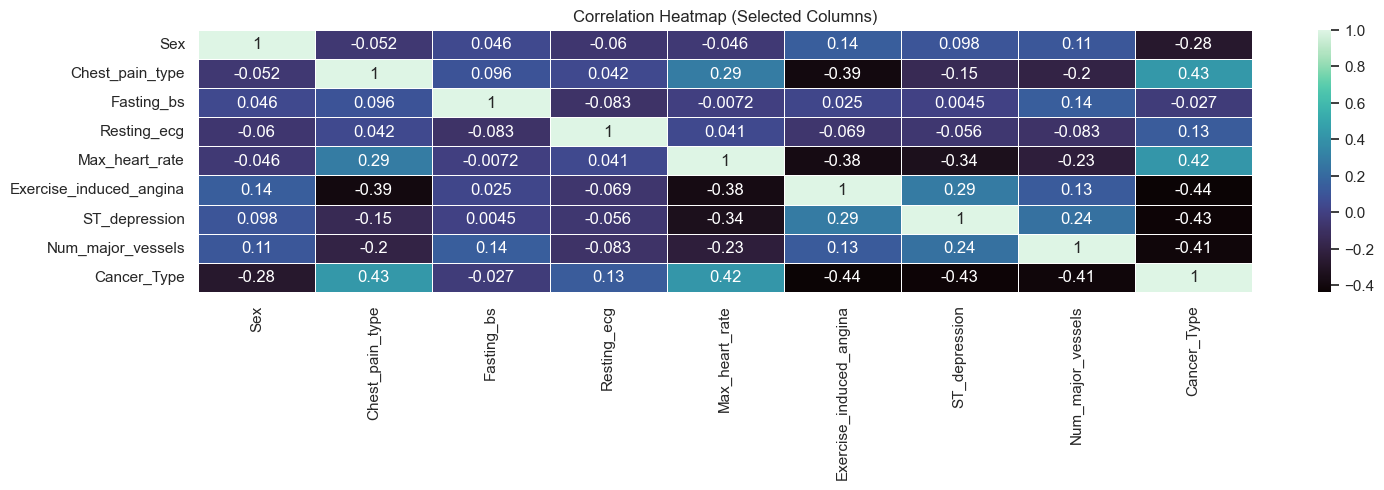

In [57]:
selected_columns = ['Sex', 'Chest_pain_type', 'Fasting_bs', 'Resting_ecg', 'Max_heart_rate',
                    'Exercise_induced_angina','ST_depression', 'Num_major_vessels', 'Cancer_Type']
#These are the other factors determining the occurance of (cardiovascular disease (CVD)),
# we already studied about remaining factors earlier.

# Creating a new DataFrame with selected columns
selected_data = data[selected_columns]

# Computing the correlation matrix
corr_matrix = selected_data.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(17, 3.4))
sns.heatmap(corr_matrix, annot=True, cmap='mako', linewidths=0.5)
plt.title('Correlation Heatmap (Selected Columns)')
plt.show()

### Observation of How are the other factors determining the occurrence of CVD?

#### Sex and Cancer_Type/Heart_disease.
- The fact that 68.2% of the overall patients are females and 31.8% are males indicates the gender distribution in the dataset.
- Based on the correlation coefficient of -0.28 between sex and cancer type, it suggests that there may be a weak negative relationship between sex and the occurrence of different types of cancer/cardiovascular disease (CVD).
- This means that while there may be some variation in the distribution of different cancer types between genders, this relationship is not strong. Therefore, based solely on gender, it is not sufficient to determine the occurrence of CVD.

#### Chest_pain and Cancer_Type/Heart_disease.
- A correlation coefficient of 0.43, indicates a moderate positive relationship between these two variables.
- This positive correlation suggests that chest pain can be an indicator or symptom of heart disease.
- The heatmap suggests that certain types of chest pain are more commonly observed in individuals who have heart disease. This means that if someone experiences a specific type of chest pain, it might indicate a higher likelihood of having heart disease.
- However, it's important to remember that chest pain can have various causes, and not all chest pain is directly related to heart disease.
- Therefore, experiencing chest pain does not necessarily mean a person has heart disease, but these are the certain types of chest pain might be more commonly associated with it.
- 0 = Typical angina
- 1 = Atypical angina
- 2 = Non-angina pain
- 3 = Asymptomatic

#### Fasting_blood_sugar/Fasting_bs and Cancer_Type/Heart_disease.
- A correlation coefficient of -0.027, indicates a very weak negative correlation.
- In simple terms, this means that there is a very slight tendency/inclination for lower levels of fasting blood sugar to be associated with a slightly higher likelihood of cancer type/heart disease, and vice versa. However, the correlation is very weak, suggesting that there is no significant relationship between fasting blood sugar levels and the occurrence of cancer type/heart disease.

#### Resting electrocardiographic results/Resting_ecg and Cancer_Type/Heart_disease.
- A correlation coefficient of 0.13, indicates a weak positive relationship. This means that there is a slight tendency for certain resting electrocardiographic results to be associated with a slightly higher likelihood of cancer type/heart disease.

#### Maximum heart rate achieved/Max_heart_rate and Cancer_Type/Heart_disease.
- A correlation coefficient of 0.42, suggests a moderate positive relationship. This means that there is a tendency for higher maximum heart rates to be associated with a higher likelihood of having cancer type/heart disease.
- In the context of determining the occurrence of cardiovascular disease (CVD), a higher maximum heart rate may indicate increased stress on the cardiovascular system, it can lead to various heart problems. 

#### Exercise_induced_angina and Cancer_Type/Heart_disease.
- A correlation coefficient of -0.44, indicates a moderate negative relationship between these two variables.
- A negative correlation means that as one variable increases, the other variable tends to decrease. In the context of exercise-induced angina and heart disease, a negative correlation suggests that individuals who experience exercise-induced angina may have a lower likelihood of having heart disease.
- so, the presence of exercise-induced angina does not necessarily indicate the presence of heart disease.

#### ST depression induced by exercise relative to rest/ST_depression and Cancer_Type/Heart_disease.
- A negative correlation coefficient of -0.43 between ST depression induced by exercise relative to rest and heart disease or Cancer_Type means that as the level of ST depression increases, the likelihood of having heart disease decreases, and vice versa. In other words, there is an inverse relationship between ST depression and heart disease in the given dataset.

#### Num_major_vessels and Cancer_Type/Heart_disease.
- A correlation coefficient of -0.41 between the number of major vessels (0-3) colored by fluoroscopy and cancer type/heart disease suggests a moderate negative relationship.
- The negative correlation suggests that a lower number of colored vessels (indicating the presence of clots) may be associated with an increased risk of developing cancer type/heart disease. This indicates that individuals with fewer colored vessels may have a higher likelihood of experiencing compromised blood flow to the heart and a higher risk of cardiovascular problems.

## Used a pair plot to understand the relationship between all the given variables.

<Figure size 2000x1800 with 0 Axes>

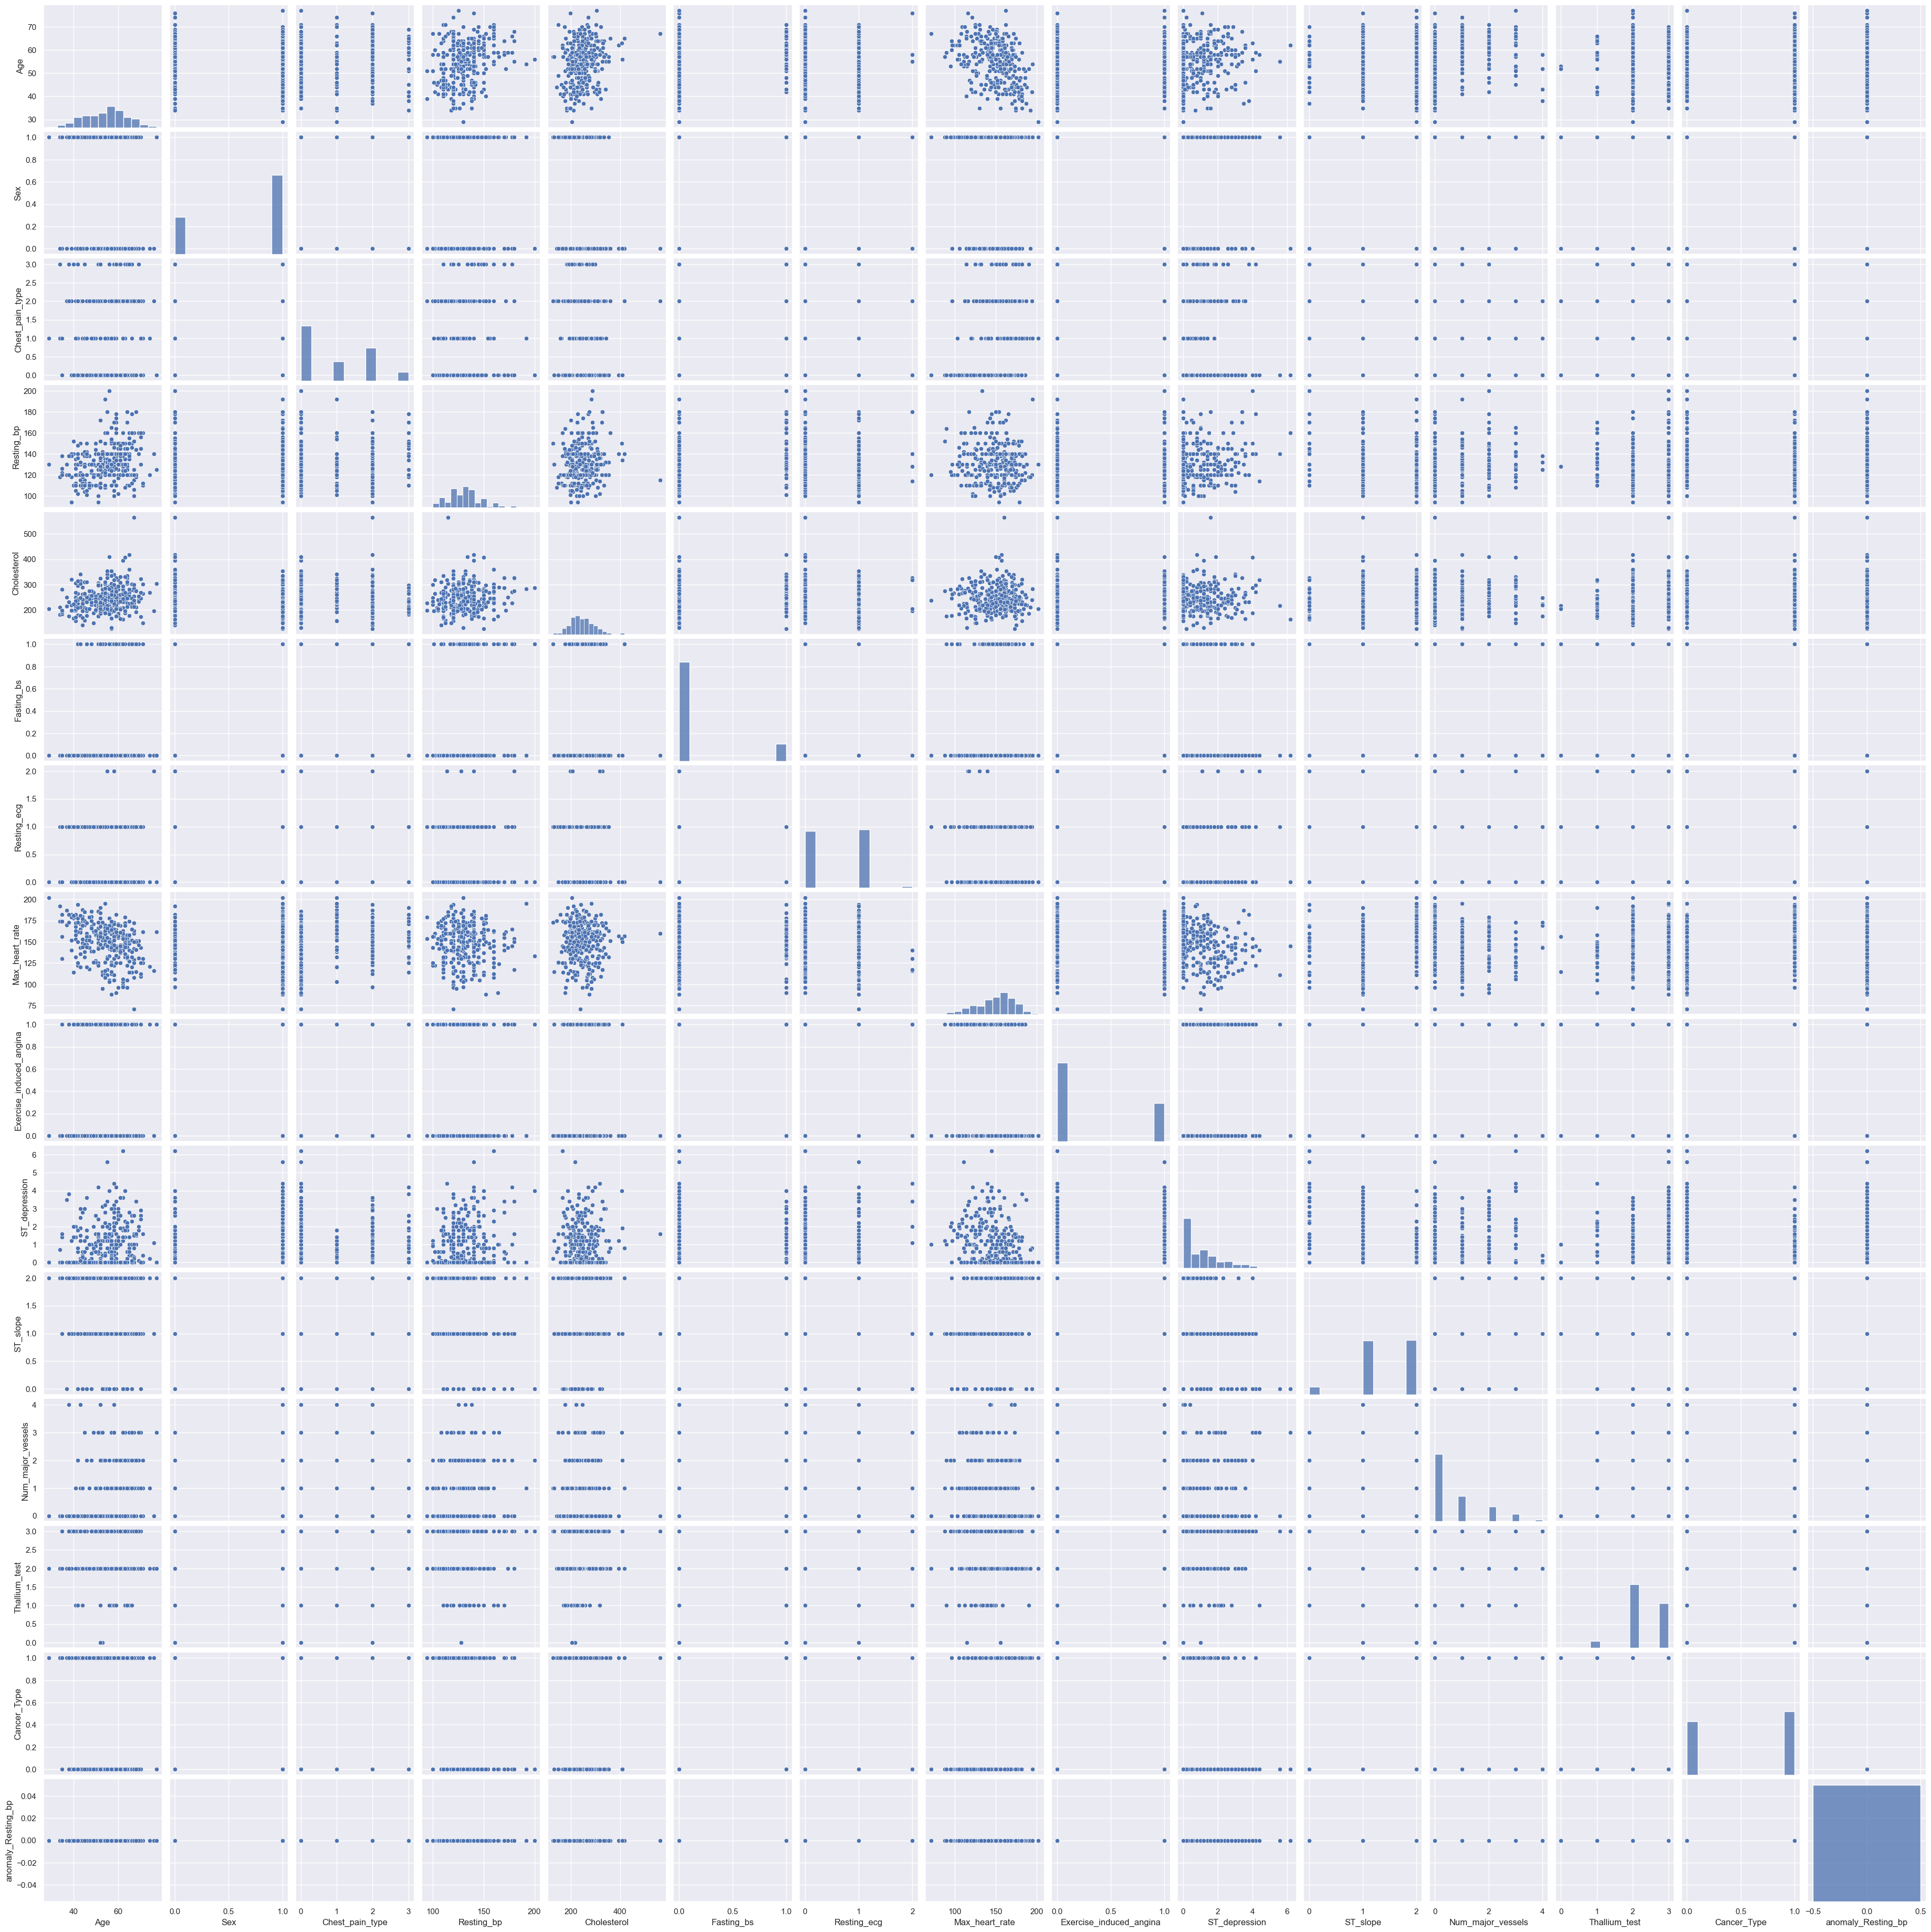

In [59]:
import warnings
# Ignore the specific RuntimeWarning and not display it during runtime.
warnings.filterwarnings("ignore", category=RuntimeWarning)

plt.figure(figsize=(20,18))
sns.pairplot(data)
plt.show()

# * 3. MODELING *

## Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [98]:
#importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

- In this step, we imported the LogisticRegression class from scikit-learn's linear_model module, which will be used to create an instance of the logistic regression model. We also imported the confusion_matrix function from the metrics module, which will be used to calculate the confusion matrix.

When we import the LogisticRegression class from scikit-learn's linear_model module, we are essentially importing the blueprint or definition of the logistic regression model. To use this model, we need to create an instance of it, which means creating an object of the LogisticRegression class. This instance represents a specific logistic regression model that we can train and use for making predictions.

Similarly, when we import the confusion_matrix function from the metrics module, we are importing a function that is defined in scikit-learn's metrics module. To use this function, we need to create an instance of it by calling it as confusion_matrix(). This instance allows us to calculate the confusion matrix based on the predicted and true labels of the test data.

In summary, creating an "instance" means creating an object or representation of a specific class or function that we can use to perform certain operations or computations.

In [99]:
data1 = data

In [100]:
data1.head(1)

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Cancer_Type,anomaly_Resting_bp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,False


In [101]:
# Splitting the data into features (X) and target variable (y)
X = data1.drop(["Cancer_Type"],axis=1)
y = data1["Cancer_Type"]

In [102]:
# Splitting the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- In the train_test_split function, X and y are the feature matrix and target variable, respectively. The test_size parameter specifies the proportion of the data to be used for testing (e.g., 0.2 for 20% test data). The random_state parameter sets the random seed=42 for reproducibility.

In [103]:
from sklearn.preprocessing import StandardScaler
# Scaling/Normalizing numerical features (if required)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Scaling or normalizing numerical features is important because many machine learning algorithms are sensitive to the scale of the features. When features have different scales, some features may dominate the learning process over others, leading to biased or inefficient models. Scaling the features helps in bringing them to a similar range, ensuring that no single feature has undue influence on the model's performance.
- The StandardScaler is just one of many scaling techniques available in scikit-learn.

In [106]:
#Creating an instance of the logistic regression model
logreg = LogisticRegression(max_iter=1000)

- Here, we created an instance of the logistic regression model by initializing the LogisticRegression class.

In [107]:
# Fitting the model on the training data.
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

- We fit the logistic regression model to the training data (X_train and y_train) using the fit method. This step involves estimating the model parameters based on the training data.

In [108]:
# Predicting the outcome for the test data.
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

- Using the trained logistic regression model, we make predictions for the test data (X_test) using the predict method. The predicted values are stored in the y_pred variable.

In [109]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
# Printing or visualizing the confusion matrix.
print(cm)

[[24  5]
 [ 6 26]]


- We calculated the confusion matrix by passing the true labels (y_test) and the predicted labels (y_pred) to the confusion_matrix function. The resulting confusion matrix is stored in the cm variable.
- Finally, we print the confusion matrix to examine the performance of the logistic regression model. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives, which can be used to evaluate the model's predictive accuracy.

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



- Precision: It measures the accuracy of positive predictions. In simpler terms, it tells us how many of the predicted positive cases are actually true positives. Higher precision means fewer false positives.

- Recall: It measures the ability to identify positive cases correctly. In simpler terms, it tells us how many of the actual positive cases are correctly identified. Higher recall means fewer false negatives.

- F1 score: It combines precision and recall into a single metric. It provides a balanced measure of both precision and recall. Higher F1 score indicates a better balance between them.

- Accuracy: It measures the overall correctness of the predictions. It tells us the percentage of correct predictions out of all the predictions made. Higher accuracy means a higher percentage of correct predictions.

In summary, precision focuses on the accuracy of positive predictions, recall focuses on correctly identifying positive cases, F1 score balances both precision and recall, and accuracy provides an overall measure of correctness.

### OVERALL CONCLUSION:

The confusion matrix provides information on the performance of a classification model. It presents the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

From the given confusion matrix, we can analyze the following metrics:

- Precision: It is the ratio of true positives to the sum of true positives and false positives. In class 0, the precision is 0.80, indicating that 80% of the predicted positive cases (class 0) are actually true positives. In class 1, the precision is 0.84, indicating that 84% of the predicted positive cases (class 1) are actually true positives.

- Recall: It is the ratio of true positives to the sum of true positives and false negatives. In class 0, the recall is 0.83, indicating that 83% of the actual positive cases (class 0) are correctly identified. In class 1, the recall is 0.81, indicating that 81% of the actual positive cases (class 1) are correctly identified.

- F1-score: It is the weighted average of precision and recall, where the F1-score reaches its best value at 1 and worst at 0. In class 0, the F1-score is 0.81, and in class 1, the F1-score is 0.83. These values indicate a good balance between precision and recall for both classes.

- Accuracy: It is the ratio of the total number of correct predictions (TP and TN) to the total number of predictions. The overall accuracy of the model is 0.82, indicating that it correctly predicts the class for approximately 82% of the samples.

- The macro average and weighted average provide an overall assessment of the model's performance across classes. The macro average calculates the average of precision, recall, and F1-score without considering class imbalance, while the weighted average considers the class imbalance by taking into account the number of samples in each class.

Overall, the model shows good performance with high precision, recall, and F1-score for both classes, as well as a decent overall accuracy.

# * 4. VISUALIZATION * 

## Visualize the variables using Tableau to create an understanding for attributes of a Diseased vs. a Healthy person.

In [ ]:
- In Tableau

## Demonstrate  the variables associated with each other and factors to build a dashboard.

In [ ]:
- In Tableau